In [3]:
import pandas as pd


df = pd.read_excel("/Users/macintoshhd/Desktop/Python-test/Coffee_beans_selling.xlsx", sheet_name=None)




In [4]:
import pandas as pd


orders_df = pd.read_excel("/Users/macintoshhd/Desktop/Python-test/Coffee_beans_selling.xlsx", sheet_name='orders')
customers_df = pd.read_excel("/Users/macintoshhd/Desktop/Python-test/Coffee_beans_selling.xlsx", sheet_name='customers')


merged_loyalty_df = pd.merge(orders_df, customers_df[['Customer ID', 'Loyalty Card']], 
                             on='Customer ID', how='inner')


loyalty_analysis = merged_loyalty_df.groupby('Loyalty Card').agg(
    Total_Quantity=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    Number_of_Purchases=pd.NamedAgg(column='Order ID', aggfunc='nunique')
).reset_index()


loyalty_analysis['Average Quantity per Purchase'] = (loyalty_analysis['Total_Quantity'] / 
                                                     loyalty_analysis['Number_of_Purchases'])


print(loyalty_analysis)


  Loyalty Card  Total_Quantity  Number_of_Purchases  \
0           No            1886                  493   
1          Yes            1665                  464   

   Average Quantity per Purchase  
0                       3.825558  
1                       3.588362  


  Loyalty Card  Total_Customers  Repeat_Purchasers  \
0           No              470                 12   
1          Yes              443                 13   

   Repeat_Purchase_Percentage (%)  
0                        2.553191  
1                        2.934537  


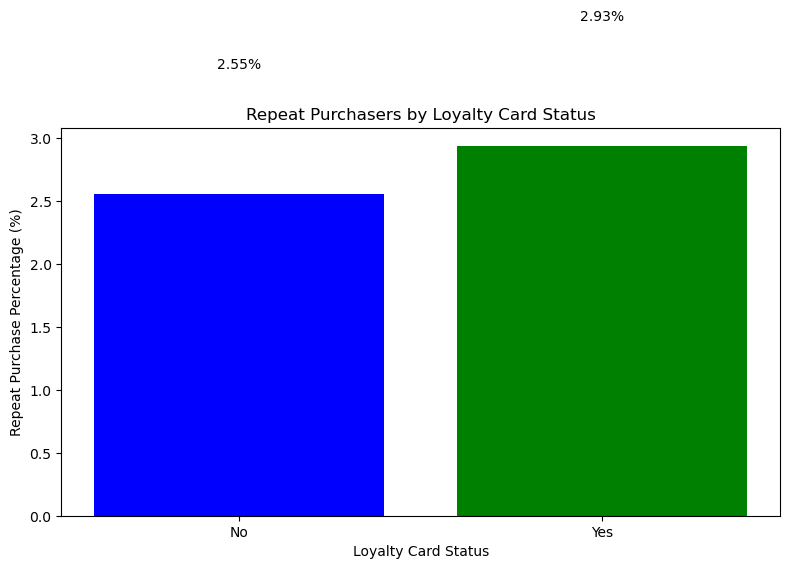

In [5]:
merged_loyalty_df = pd.merge(orders_df, customers_df[['Customer ID', 'Loyalty Card']], 
                             on='Customer ID', how='inner')


customer_purchases = merged_loyalty_df.groupby(['Customer ID', 'Loyalty Card']).agg(
    Number_of_Purchases=pd.NamedAgg(column='Order ID', aggfunc='nunique')
).reset_index()


customer_purchases['Repeat_Purchase'] = customer_purchases['Number_of_Purchases'] > 1


loyalty_repeat_analysis = customer_purchases.groupby('Loyalty Card').agg(
    Total_Customers=pd.NamedAgg(column='Customer ID', aggfunc='count'),
    Repeat_Purchasers=pd.NamedAgg(column='Repeat_Purchase', aggfunc='sum')
).reset_index()


loyalty_repeat_analysis['Repeat_Purchase_Percentage (%)'] = (loyalty_repeat_analysis['Repeat_Purchasers'] / 
                                                             loyalty_repeat_analysis['Total_Customers']) * 100


print(loyalty_repeat_analysis)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(loyalty_repeat_analysis['Loyalty Card'], 
        loyalty_repeat_analysis['Repeat_Purchase_Percentage (%)'], 
        color=['blue', 'green'])

# Add labels and title
plt.xlabel('Loyalty Card Status')
plt.ylabel('Repeat Purchase Percentage (%)')
plt.title('Repeat Purchasers by Loyalty Card Status')

# Show values on top of bars
for i, value in enumerate(loyalty_repeat_analysis['Repeat_Purchase_Percentage (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


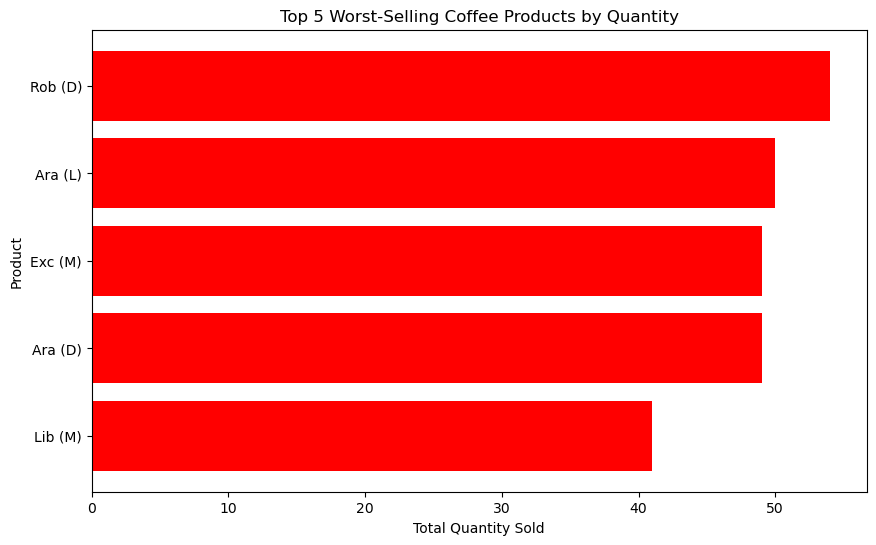

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "/Users/macintoshhd/Desktop/Python-test/Coffee_beans_selling.xlsx"  
orders_df = pd.read_excel(file_path, sheet_name='orders')
products_df = pd.read_excel(file_path, sheet_name='products')


merged_df = pd.merge(orders_df, products_df, on='Product ID', how='inner')


product_sales = merged_df.groupby('Product ID').agg(Total_Quantity=('Quantity', 'sum')).reset_index()


product_sales_details = pd.merge(product_sales, products_df[['Product ID', 'Coffee Type', 'Roast Type']], on='Product ID')


worst_selling_products = product_sales_details.sort_values(by='Total_Quantity').head(5)


plt.figure(figsize=(10, 6))
plt.barh(worst_selling_products['Coffee Type'] + ' (' + worst_selling_products['Roast Type'] + ')', worst_selling_products['Total_Quantity'], color='red')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top 5 Worst-Selling Coffee Products by Quantity')
plt.show()


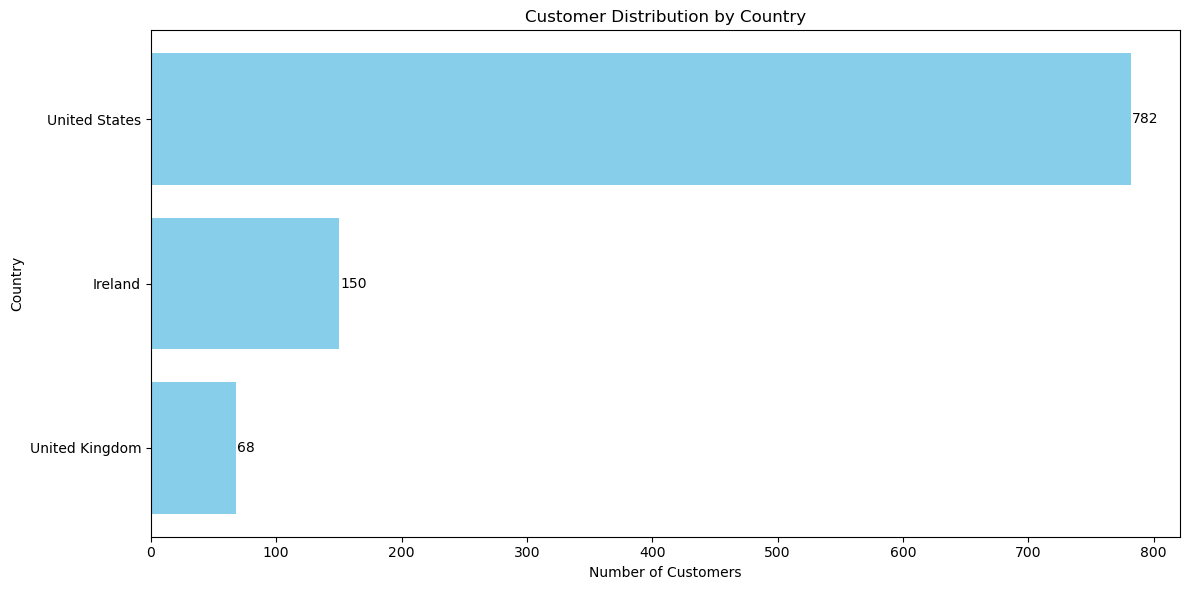

In [7]:
customers_df = pd.read_excel(file_path, sheet_name='customers')


country_customer_counts = customers_df['Country'].value_counts().reset_index()
country_customer_counts.columns = ['Country', 'Customer Count']


country_customer_counts = country_customer_counts.sort_values(by='Customer Count', ascending=False)



plt.figure(figsize=(12, 6))
plt.barh(country_customer_counts['Country'], country_customer_counts['Customer Count'], color='skyblue')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.title('Customer Distribution by Country')
plt.gca().invert_yaxis()  


for i, value in enumerate(country_customer_counts['Customer Count']):
    plt.text(value + 1, i, str(value), va='center')


plt.tight_layout()
plt.show()

          Product Pair  Frequency
28  (L-D-2.5, L-L-0.5)          2
24  (E-L-0.5, L-D-2.5)          2
9     (E-L-1, A-L-0.2)          2
29    (L-D-2.5, E-M-1)          2
42  (E-M-0.2, A-L-0.2)          2
41  (E-L-0.5, L-D-0.5)          1
31  (L-D-0.5, R-M-2.5)          1
32  (E-L-0.2, L-D-0.5)          1
33  (E-L-0.2, A-D-0.2)          1
34  (E-L-0.2, R-D-2.5)          1


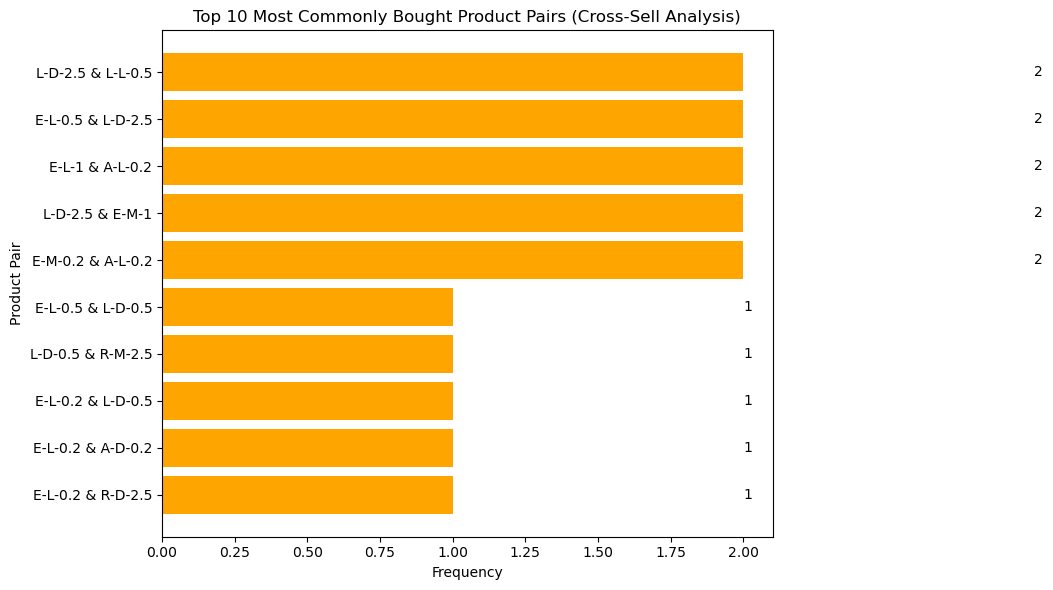

In [8]:
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
orders_df = pd.read_excel(file_path, sheet_name='orders')


order_product_pairs = orders_df.groupby('Order ID')['Product ID'].apply(list)


product_pairs = []
for products in order_product_pairs:
    if len(products) > 1:  
        product_pairs.extend(combinations(products, 2))


pair_counts = Counter(product_pairs)


pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['Product Pair', 'Frequency']).sort_values(by='Frequency', ascending=False)


top_pairs = pair_counts_df.head(10)
print(top_pairs)

plt.figure(figsize=(12, 6))
plt.barh([f"{pair[0]} & {pair[1]}" for pair in top_pairs['Product Pair']], top_pairs['Frequency'], color='orange')
plt.xlabel('Frequency')
plt.ylabel('Product Pair')
plt.title('Top 10 Most Commonly Bought Product Pairs (Cross-Sell Analysis)')
plt.gca().invert_yaxis()  

for i, value in enumerate(top_pairs['Frequency']):
    plt.text(value + 1, i, str(value), va='center')


plt.tight_layout()
plt.show()

In [9]:
product_counts_per_order = orders_df.groupby('Order ID')['Product ID'].count()
print("Average number of products per order:", product_counts_per_order.mean())
print("Orders with multiple products:", sum(product_counts_per_order > 1))

unique_products = orders_df['Product ID'].nunique()
print("Total unique products:", unique_products)


Average number of products per order: 1.044932079414838
Orders with multiple products: 31
Total unique products: 48
